First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Model Performance:
Mean Squared Error (MSE): 1754318687330.66
R² Sc

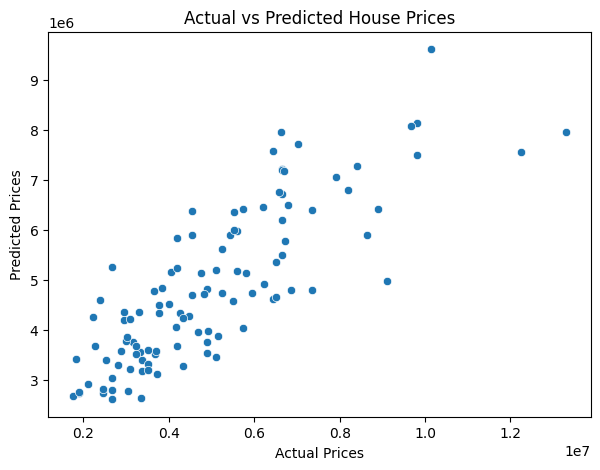

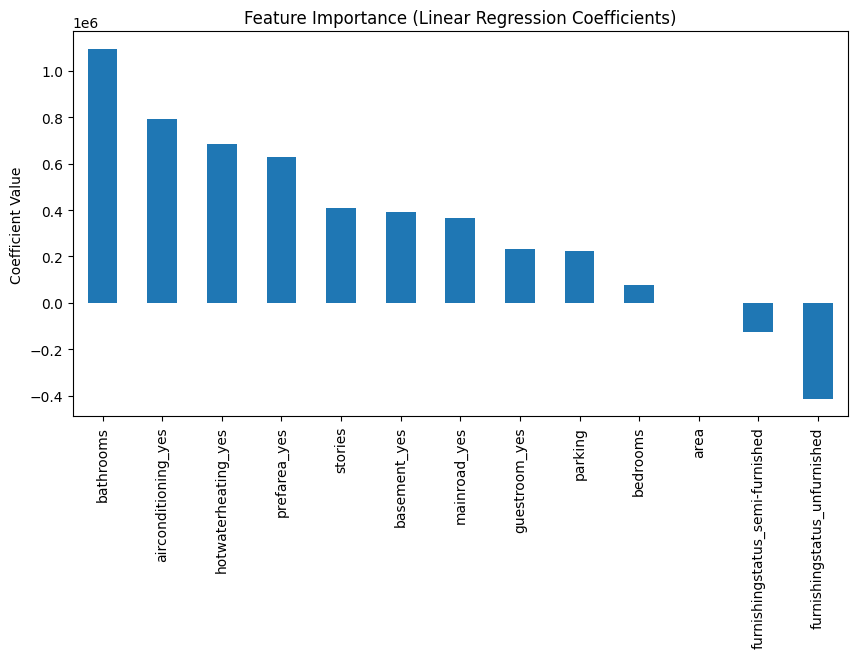


Feature Importance (Top 10):
                      Coefficient
bathrooms            1.094445e+06
airconditioning_yes  7.914267e+05
hotwaterheating_yes  6.846499e+05
prefarea_yes         6.298906e+05
stories              4.074766e+05
basement_yes         3.902512e+05
mainroad_yes         3.679199e+05
guestroom_yes        2.316100e+05
parking              2.248419e+05
bedrooms             7.677870e+04


In [5]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
data = pd.read_csv("Housing.csv")
print("First few rows of the dataset:")
print(data.head())

# Step 3: Preprocess the data
# Convert categorical variables into numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Step 4: Define features (X) and target (y)
X = data.drop("price", axis=1)
y = data["price"]

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 9: Visualize Actual vs Predicted Prices
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Step 10: Show feature importance (coefficients)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10,5))
coeff_df['Coefficient'].plot(kind='bar')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()

print("\nFeature Importance (Top 10):")
print(coeff_df.head(10))
